# <u><b> Objective </b></u>
## <b> This project will focus on predicting heart disease using neural networks. Based on attributes such as blood pressure, cholestoral levels, heart rate, and other characteristic attributes, patients will be classified according to varying degrees of coronary artery disease. This project will utilize a dataset of 303 patients and distributed by the UCI Machine Learning Repository.

## <b>Machine learning and artificial intelligence is going to have a dramatic impact on the health field; as a result, familiarizing yourself with the data processing techniques appropriate for numerical health data and the most widely used algorithms for classification tasks is an incredibly valuable use of your time! </b>

<br>
<br>

## <b>Things to do :</b>
* ### Read the heart.csv data, clean the data and normalise the features.
* ### Split the data into train and test. 
* ### Use the keras package to build the model. The code to build such a model is provided below:
* ### Evaluate the model across various metrics. 





## Explore the keras package to understand how the code works

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam 
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

	
model = create_model()

print(model.summary())

## Solution start here

In [ ]:
# Loading in the data
import sklearn
from sklearn.datasets import load_breast_cancer 
# Visualization
import matplotlib as mpl   
import matplotlib.pyplot as plt
import pandas as pd

# Building the network 
import numpy as np

# Progress Bar
import tqdm as tqdm

import warnings
warnings.filterwarnings("ignore") #supresses warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/ML/week 11/4. Neural Networks/heart.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
X=df.drop(['target'],axis=1)
y=df['target']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

In [ ]:
X= scaler.fit_transform(df.drop('target',axis=1))
print (X.shape, y.shape)

(303, 13) (303,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
y_train

137    1
106    1
284    0
44     1
139    1
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 212, dtype: int64

In [ ]:
X_train

array([[0.6875    , 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       [0.83333333, 1.        , 1.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.66666667, 1.        , 0.        , ..., 1.        , 0.25      ,
        1.        ],
       ...,
       [0.5625    , 1.        , 1.        , ..., 0.5       , 0.        ,
        1.        ],
       [0.375     , 1.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667],
       [0.60416667, 1.        , 0.33333333, ..., 0.5       , 0.        ,
        0.66666667]])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam 
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model(a,b):
    # create model
   
    model = Sequential()
    model.add(Dense(a, input_dim=13, activation='sigmoid'))
    model.add(Dense(b, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model


In [ ]:
model = create_model(10,10)
model.fit(X_train, y_train, epochs=1000, verbose=2)

Epoch 1/1000
7/7 - 1s - loss: 0.7238 - accuracy: 0.4434 - 630ms/epoch - 90ms/step
Epoch 2/1000
7/7 - 0s - loss: 0.7100 - accuracy: 0.4434 - 22ms/epoch - 3ms/step
Epoch 3/1000
7/7 - 0s - loss: 0.7013 - accuracy: 0.4434 - 14ms/epoch - 2ms/step
Epoch 4/1000
7/7 - 0s - loss: 0.6953 - accuracy: 0.4434 - 16ms/epoch - 2ms/step
Epoch 5/1000
7/7 - 0s - loss: 0.6910 - accuracy: 0.4434 - 17ms/epoch - 2ms/step
Epoch 6/1000
7/7 - 0s - loss: 0.6874 - accuracy: 0.6368 - 17ms/epoch - 2ms/step
Epoch 7/1000
7/7 - 0s - loss: 0.6841 - accuracy: 0.7028 - 16ms/epoch - 2ms/step
Epoch 8/1000
7/7 - 0s - loss: 0.6821 - accuracy: 0.5943 - 16ms/epoch - 2ms/step
Epoch 9/1000
7/7 - 0s - loss: 0.6801 - accuracy: 0.5660 - 16ms/epoch - 2ms/step
Epoch 10/1000
7/7 - 0s - loss: 0.6787 - accuracy: 0.5613 - 15ms/epoch - 2ms/step
Epoch 11/1000
7/7 - 0s - loss: 0.6771 - accuracy: 0.5566 - 17ms/epoch - 2ms/step
Epoch 12/1000
7/7 - 0s - loss: 0.6760 - accuracy: 0.5566 - 18ms/epoch - 3ms/step
Epoch 13/1000
7/7 - 0s - loss: 0.67

In [ ]:
model.summary()
score_train = model.evaluate(X_train, y_train, verbose=1)
score_test = model.evaluate(X_test, y_test, verbose=1)
print('Model Accuracy(train) = ',score_train[1])
print('Model Accuracy(test) = ',score_test[1])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 10)                140       
                                                                 
 dense_32 (Dense)            (None, 10)                110       
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
3/3 [==============================] - 0s 5ms/step - loss: 0.4258 - accuracy: 0.8132
Model Accuracy(train) =  0.8679245114326477
Model Accuracy(test) =  0.8131868243217468


In [ ]:
train_pred=model.predict(X_train)>0.5
test_pred=model.predict(X_test)>0.5

Evaluation

In [ ]:

import seaborn as sns
import matplotlib as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
# Confusion matrices for train and test 

print(confusion_matrix(y_train,train_pred))
print(confusion_matrix(y_test,test_pred))

[[ 78  16]
 [ 12 106]]
[[33 11]
 [ 6 41]]


[Text(0, 0.5, 'No heart disease.'), Text(0, 1.5, 'Heart disease.')]

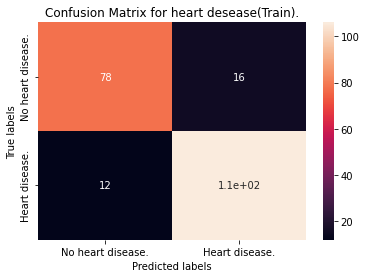

In [ ]:
# Get the confusion matrix for both train and test

labels = ['No heart disease.', 'Heart disease.']
cm = confusion_matrix(y_train,train_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True,ax=ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for heart desease(Train).')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'No heart disease.'), Text(0, 1.5, 'Heart disease.')]

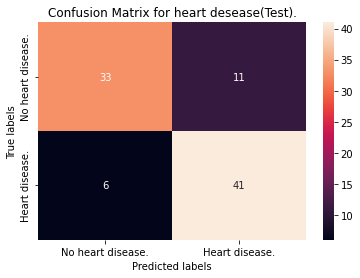

In [ ]:
# Get the confusion matrix for both train and test

labels = ['No heart disease.', 'Heart disease.']
cm = confusion_matrix(y_test,test_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True,ax=ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for heart desease(Test).')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,train_pred))
print("\n")
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        94
           1       0.87      0.90      0.88       118

    accuracy                           0.87       212
   macro avg       0.87      0.86      0.87       212
weighted avg       0.87      0.87      0.87       212



              precision    recall  f1-score   support

           0       0.85      0.75      0.80        44
           1       0.79      0.87      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [ ]:
roc_auc_score(y_train,train_pred)

0.864046159394158

In [ ]:
roc_auc_score(y_test,test_pred)

0.8111702127659575

ROC curve for train and test

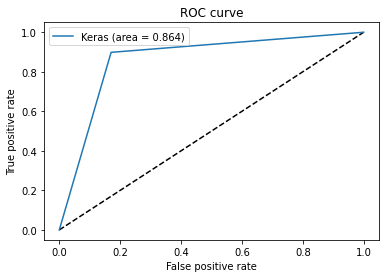

In [ ]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred)
auc_train = auc(fpr_train, tpr_train)
plt.figure
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train, tpr_train, label='Keras (area = {:.3f})'.format(auc_train))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

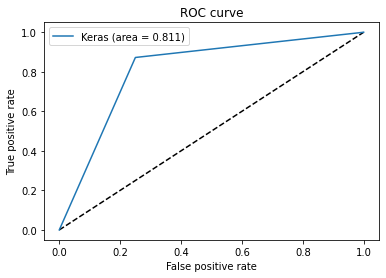

In [ ]:
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_pred)
auc_test = auc(fpr_test, tpr_test)
plt.figure
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_test, tpr_test, label='Keras (area = {:.3f})'.format(auc_test))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Changing values of dense.

In [ ]:
model2 = create_model(30,20)
model2.fit(X_train, y_train, epochs=1000, verbose=2)

Epoch 1/1000
7/7 - 1s - loss: 0.7180 - accuracy: 0.4434 - 1s/epoch - 167ms/step
Epoch 2/1000
7/7 - 0s - loss: 0.6975 - accuracy: 0.4245 - 20ms/epoch - 3ms/step
Epoch 3/1000
7/7 - 0s - loss: 0.6905 - accuracy: 0.5660 - 20ms/epoch - 3ms/step
Epoch 4/1000
7/7 - 0s - loss: 0.6863 - accuracy: 0.5566 - 32ms/epoch - 5ms/step
Epoch 5/1000
7/7 - 0s - loss: 0.6836 - accuracy: 0.5566 - 23ms/epoch - 3ms/step
Epoch 6/1000
7/7 - 0s - loss: 0.6825 - accuracy: 0.5566 - 21ms/epoch - 3ms/step
Epoch 7/1000
7/7 - 0s - loss: 0.6805 - accuracy: 0.5566 - 23ms/epoch - 3ms/step
Epoch 8/1000
7/7 - 0s - loss: 0.6789 - accuracy: 0.5566 - 25ms/epoch - 4ms/step
Epoch 9/1000
7/7 - 0s - loss: 0.6772 - accuracy: 0.5566 - 26ms/epoch - 4ms/step
Epoch 10/1000
7/7 - 0s - loss: 0.6772 - accuracy: 0.5566 - 28ms/epoch - 4ms/step
Epoch 11/1000
7/7 - 0s - loss: 0.6740 - accuracy: 0.5566 - 27ms/epoch - 4ms/step
Epoch 12/1000
7/7 - 0s - loss: 0.6720 - accuracy: 0.5566 - 26ms/epoch - 4ms/step
Epoch 13/1000
7/7 - 0s - loss: 0.6703

In [ ]:
model2.summary()
score_train2 = model2.evaluate(X_train, y_train, verbose=1)
score_test2 = model2.evaluate(X_test, y_test, verbose=1)
print('Model Accuracy(train) = ',score_train2[1])
print('Model Accuracy(test) = ',score_test2[1])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 30)                420       
                                                                 
 dense_35 (Dense)            (None, 20)                620       
                                                                 
 dense_36 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________
3/3 [==============================] - 0s 4ms/step - loss: 0.4227 - accuracy: 0.8132
Model Accuracy(train) =  0.8632075190544128
Model Accuracy(test) =  0.8131868243217468


In [ ]:
train_pred2=model2.predict(X_train)>0.5
test_pred2=model2.predict(X_test)>0.5

In [ ]:
# Confusion matrices for train and test 

print(confusion_matrix(y_train,train_pred2))
print(confusion_matrix(y_test,test_pred2))

[[ 76  18]
 [ 11 107]]
[[33 11]
 [ 6 41]]


[Text(0, 0.5, 'No heart disease.'), Text(0, 1.5, 'Heart disease.')]

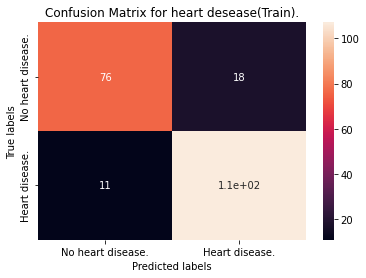

In [ ]:
# Get the confusion matrix for both train and test

labels = ['No heart disease.', 'Heart disease.']
cm = confusion_matrix(y_train,train_pred2)

ax= plt.subplot()
sns.heatmap(cm, annot=True,ax=ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for heart desease(Train).')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'No heart disease.'), Text(0, 1.5, 'Heart disease.')]

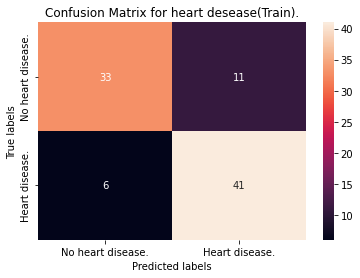

In [ ]:
# Get the confusion matrix for both train and test

labels = ['No heart disease.', 'Heart disease.']
cm = confusion_matrix(y_test,test_pred2)

ax= plt.subplot()
sns.heatmap(cm, annot=True,ax=ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for heart desease(Train).')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,train_pred2))
print("\n")
print(classification_report(y_test,test_pred2))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        94
           1       0.86      0.91      0.88       118

    accuracy                           0.86       212
   macro avg       0.86      0.86      0.86       212
weighted avg       0.86      0.86      0.86       212



              precision    recall  f1-score   support

           0       0.85      0.75      0.80        44
           1       0.79      0.87      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [ ]:
roc_auc_score(y_train,train_pred2)

0.8576451496574108

In [ ]:
roc_auc_score(y_test,test_pred2)

0.8111702127659575

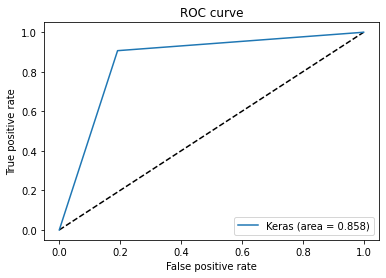

In [ ]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred2)
auc_train = auc(fpr_train, tpr_train)
plt.figure
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train, tpr_train, label='Keras (area = {:.3f})'.format(auc_train))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

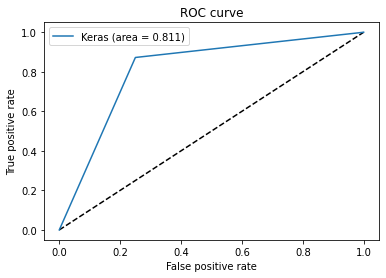

In [ ]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_test, test_pred2)
auc_train = auc(fpr_train, tpr_train)
plt.figure
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train, tpr_train, label='Keras (area = {:.3f})'.format(auc_train))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

##**The model performs well on both train and test data based on accuracy but false positives and false negatives can't be avoided in case of health related problems therefore this is not the optimal model.**